# Importing libraries and reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_auc_score, brier_score_loss

sns.set_palette('tab20')
pd.set_option('display.max_columns', 100)

df = pd.read_csv('../data/training_data.csv')
df_hist = pd.read_csv('../data/training_hist_data.csv')
df_target = pd.read_csv('../data/training_output.csv')

In [2]:
df.head()

contract_id                  company_category  \
0  d07d473503c6bef7cf1922fab1f88f3e                               NaN   
1  79e38c743a89ad6b950ae6136bbaeb2b  ixuciffexbsibwibpcwdmfwcoixkfscw   
2  6f6a16ed39fd75715b1acc656c749f83  fmwdwsxillemwbbwelxsampiuwwpcdcb   
3  1d8e17bf13218e671e968871e0c6373f  afeccskfmobewicibxofslkxecsuekfi   
4  2c195164c61eeb0edee79688790f3dda                               NaN   

   campaing_code_elect                           channel  elect_cons_at_12m  \
0                  NaN  lmkebamcaaclubfxadlmueccxoimlema               1577   
1                  NaN  foosdfpfkusacimwkcsosbicdxkicaua             280731   
2                  NaN  foosdfpfkusacimwkcsosbicdxkicaua              99223   
3                  NaN  foosdfpfkusacimwkcsosbicdxkicaua              10381   
4                  NaN  foosdfpfkusacimwkcsosbicdxkicaua               6107   

   gas_cons_at_12m  elect_cons_last_month contract_activation_date  \
0                0                      0               2010-01-05   
1                0                  16856               2009-11-04   
2           189585                   4783               2013-02-16   
3                0                      0               2012-01-25   
4                0                      0               2011-11-12   

  contract_end_date contract_fist_act_date contract_last_mod_date  \
0        2016-12-12                    NaN             2015-11-01   
1        2016-11-04                    NaN             2009-11-04   
2        2016-02-16                    NaN             2013-02-16   
3        2017-01-25                    NaN             2015-12-16   
4        2016-11-12             2011-11-12             2015-09-20   

  contract_renewal_date  fcst_bill_baseline_elect_next_month  \
0            2015-12-14                                  NaN   
1            2015-11-05                                  NaN   
2            2015-02-18                                  NaN   
3            2016-01-26                                  NaN   
4            2015-11-13                                  0.0   

   fcst_bill_baseline_elect_cal_year  fcst_bill_baseline_elect_12m  \
0                                NaN                           NaN   
1                                NaN                           NaN   
2                                NaN                           NaN   
3                                NaN                           NaN   
4                                0.0                    983.785888   

   fcst_consumption_elect_next_month  fcst_consumption_elect_12m  \
0                                NaN                  113.189528   
1                                NaN                12910.745989   
2                                NaN                  622.245387   
3                                NaN                  525.026971   
4                                0.0                  156.718305   

   fcst_consumption_elect_cal_year  fcst_current_discount  \
0                         0.000000                    0.0   
1                     20467.614893                    0.0   
2                         0.000000                    0.0   
3                         0.000000                    0.0   
4                         0.000000                    0.0   

   fcst_bill_meter_rent_12m  fcst_price_period_1  fcst_price_period_2  \
0                  9.533935             0.179799             0.000000   
1                248.193187             0.139908             0.049123   
2                 81.197343             0.151782             0.053042   
3                 89.052476             0.151063             0.052747   
4                 12.829360             0.180165             0.000000   

   fcst_price_power_period_1 client_got_gas  current_paid_consumption  \
0                  29.744311              f                  0.000000   
1                  27.257522              f               1440.595633   
2                  27.257522      

In [3]:
df_hist.head()

contract_id reference_date  price_energy_1st_period  \
0  cd7ad4a23c39fd588bf326333786300c     2015-02-01                 0.136157   
1  73c63df734c0948948b61dcab3153dce     2015-06-01                 0.134560   
2  75d7981514dd168b8ca9954c62342426     2015-03-01                 0.153324   
3  3d4e8ae29da9e25cf77dd6966ff8c02e     2015-09-01                 0.133067   
4  5c8b795e6ff043528535ef4060416db3     2015-04-01                 0.137101   

   price_energy_2nd_period  price_energy_3rd_period  price_power_1st_period  \
0                 0.000000                      0.0               39.926856   
1                 0.000000                      0.0               39.926855   
2                 0.067422                      0.0               39.926856   
3                 0.000000                      0.0               39.926855   
4                 0.000000                      0.0               39.926855   

   price_power_2nd_period  price_power_3rd_period  
0                     0.0                     0.0  
1                     0.0                     0.0  
2                     0.0                     0.0  
3                     0.0                     0.0  
4                     0.0                     0.0

In [4]:
df_target.head()

contract_id  has_churned_over_next_3m
0  6975aab29f35173b43eae4f595b747c7                         0
1  8073016b742f47cf4c76cc41dc410122                         1
2  227c0e6b15256a1d3d3460e15c24ba60                         0
3  e1ea0597bbad7bfd95adf1c7103bfda1                         0
4  a2e017f297f2557a7b1cf4a92bc993e9                         0

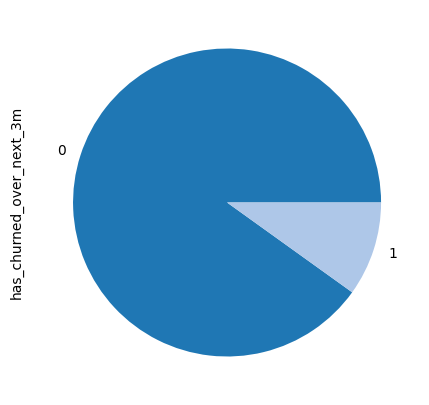

0    14501
1     1595
Name: has_churned_over_next_3m, dtype: int64


In [6]:
df_target.has_churned_over_next_3m.value_counts().plot.pie(figsize=(5, 5))
plt.show()
print(df_target.has_churned_over_next_3m.value_counts())

# Descriptive analysis

 Let's check missing data and how the data is distributed

In [7]:
def missing_data(df):
    total = df.isna().sum()
    percentage = (df.isna().sum() / df.isna().count() * 100)
    missed_data = pd.concat([total, percentage], axis=1, keys=['total_available', 'percentage_missed'])
    
    return missed_data, missed_data.style.format({'total_available': "{:0.0f}",
                                        'percentage_missed': '{:.1f}%'})
    
missing_df, missing_df_stld = missing_data(df)
missing_df_stld

In [8]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

campaing_code_elect  elect_cons_at_12m  gas_cons_at_12m  \
count                 0.00           16096.00         16096.00   
mean                   NaN          228759.80         16314.17   
std                    NaN          797961.68         90789.17   
min                    NaN         -147112.00         -1552.00   
25%                    NaN            6934.75             0.00   
50%                    NaN           18003.50             0.00   
75%                    NaN           58974.75             0.00   
max                    NaN        18903001.00       2141273.00   

       elect_cons_last_month  fcst_bill_baseline_elect_next_month  \
count               16096.00                              3508.00   
mean                14561.58                               233.56   
std                 61623.81                               451.62   
min                -68379.00                              -253.79   
25%                     0.00                                 0.00   
50%                   673.00                               113.32   
75%                  3087.00                               275.52   
max               3396121.00                              8738.87   

       fcst_bill_baseline_elect_cal_year  fcst_bill_baseline_elect_12m  \
count                            3508.00                       3508.00   
mean                              437.91                       4694.26   
std                               846.76                       6637.20   
min                              -475.84                      -3062.46   
25%                                 0.00                       1416.77   
50%                               212.48                       2675.59   
75%                               516.58                       5194.72   
max                             16384.86                      99235.66   

       fcst_consumption_elect_next_month  fcst_consumption_elect_12m  \
count                            3508.00                    16096.00   
mean                              315.64                     1341.14   
std                               695.29                     2282.85   
min                                 0.00                    -9441.94   
25%                                 0.00                      290.36   
50%                                64.42                      667.11   
75%                               348.10                     1523.04   
max                             14775.95                    58725.90   

       fcst_consumption_elect_cal_year  fcst_current_discount  \
count                         16096.00               15970.00   
mean                           1732.83                   0.51   
std                            4776.32                   2.66   
min                          -77792.20                   0.00   
25%                               0.00                   0.00   
50%                             343.41                   0.00   
75%                            1811.78                   0.00   
max                          159328.33                  25.77   

       fcst_bill_meter_rent_12m  fcst_price_period_1  fcst_price_period_2  \
count                  16096.00             15970.00             15970.00   
mean                      48.57                 0.17                 0.03   
std                       54.59                 0.03                 0.02   
min                     -167.85                 0.00                 0.00   
25%                       11.21                 0.15                 0.00   
50%                       13.43                 0.18                 0.04   
75%                       90.83                 0.18                 0.05   
max                     1666.15                 0.35                 0.10   

       fcst_price_power_period_1  current_paid_consumption  \
count                   15970.00                  16096.00   
mean                       29.22                    135.85   
std     

For baseline(this task/iteration) I decided to keep large values and use tree-based algorithm (as it's not required to transform data additionally)

Lets check distribution

- - - - - - - - -
 campaing_code_elect
 missing values : 100.0 %
- - - - - - - - -
 elect_cons_at_12m
 missing values : 0.0 %

minimum: -147112 
maximum: 18903001


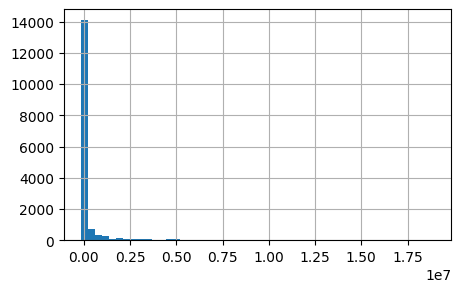

- - - - - - - - -
 gas_cons_at_12m
 missing values : 0.0 %

minimum: -1552 
maximum: 2141273


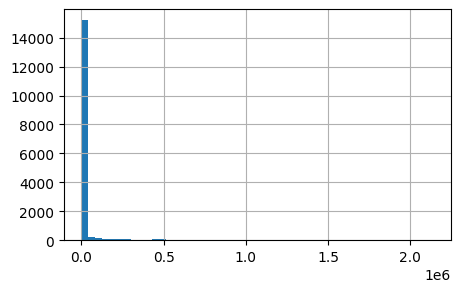

- - - - - - - - -
 elect_cons_last_month
 missing values : 0.0 %

minimum: -68379 
maximum: 3396121


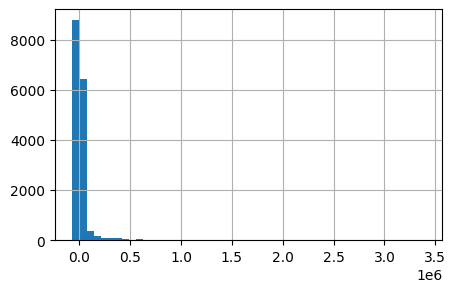

- - - - - - - - -
 fcst_bill_baseline_elect_next_month
 missing values : 78.21 %

median: 113.32433538140168 
mean: 233.55700576816352 
mode: 0.0

minimum: -253.79143293601743 
maximum: 8738.870635141751


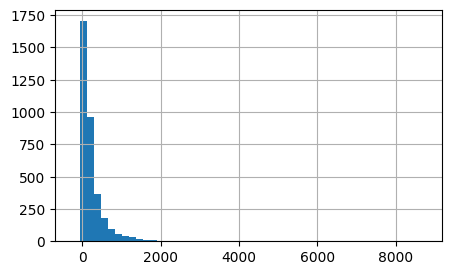

- - - - - - - - -
 fcst_bill_baseline_elect_cal_year
 missing values : 78.21 %

median: 212.47639967234983 
mean: 437.90551726472273 
mode: 0.0

minimum: -475.8438666897447 
maximum: 16384.863529162783


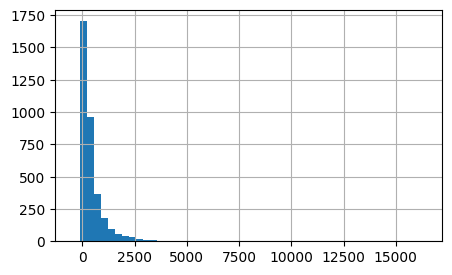

- - - - - - - - -
 fcst_bill_baseline_elect_12m
 missing values : 78.21 %

median: 2675.593752227639 
mean: 4694.2641974426815 
mode: 0.0

minimum: -3062.4559131078345 
maximum: 99235.65514018846


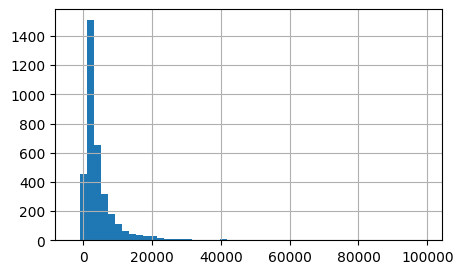

- - - - - - - - -
 fcst_consumption_elect_next_month
 missing values : 78.21 %

median: 64.41946581081983 
mean: 315.6426638995598 
mode: 0.0

minimum: 0.0 
maximum: 14775.946969203578


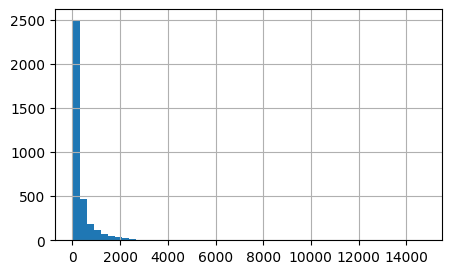

- - - - - - - - -
 fcst_consumption_elect_12m
 missing values : 0.0 %

minimum: -9441.942657148724 
maximum: 58725.90341101798


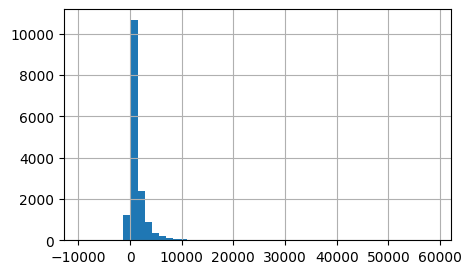

- - - - - - - - -
 fcst_consumption_elect_cal_year
 missing values : 0.0 %

minimum: -77792.19940838122 
maximum: 159328.33068126708


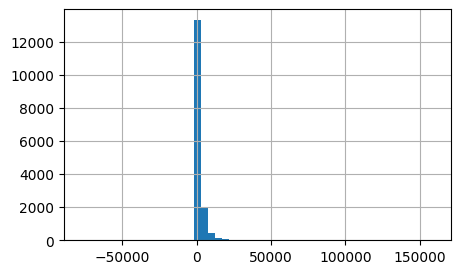

- - - - - - - - -
 fcst_current_discount
 missing values : 0.78 %

median: 0.0 
mean: 0.5109928710575886 
mode: 0.0

minimum: 0.0 
maximum: 25.767464953551283


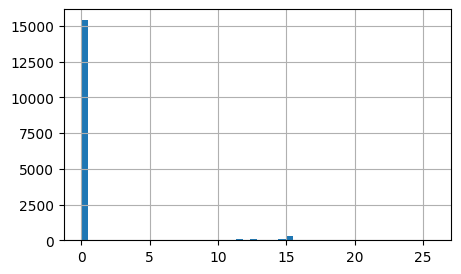

- - - - - - - - -
 fcst_bill_meter_rent_12m
 missing values : 0.0 %

minimum: -167.85251712505 
maximum: 1666.151782290549


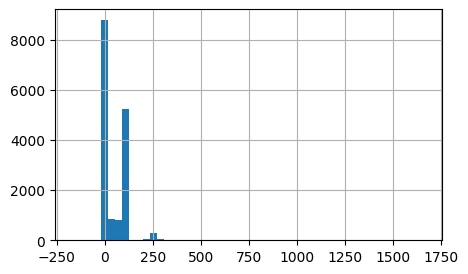

- - - - - - - - -
 fcst_price_period_1
 missing values : 0.78 %

median: 0.1801647674464923 
mean: 0.171362875793297 
mode: 0.183733235555433

minimum: 0.0 
maximum: 0.3454516708585701


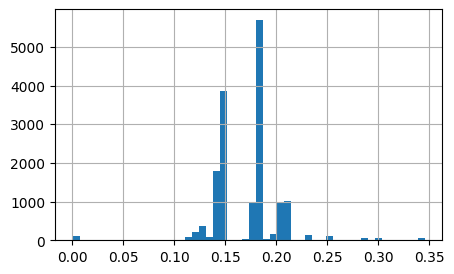

- - - - - - - - -
 fcst_price_period_2
 missing values : 0.78 %

median: 0.0441623037968959 
mean: 0.027139570586630066 
mode: 0.0

minimum: 0.0 
maximum: 0.1004457538223679


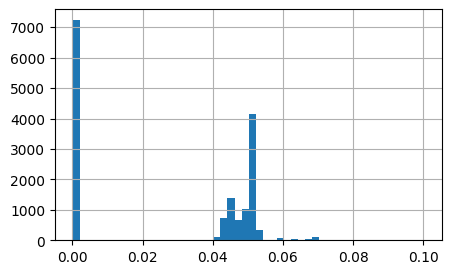

- - - - - - - - -
 fcst_price_power_period_1
 missing values : 0.78 %

median: 29.744310877528388 
mean: 29.222152239411255 
mode: 29.744310877528388

minimum: -0.0820168328671837 
maximum: 39.90266190031044


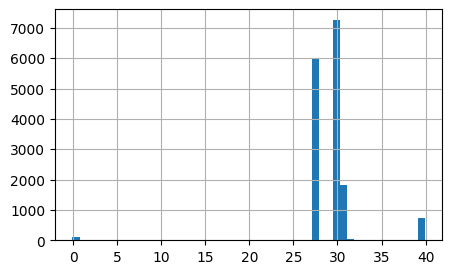

- - - - - - - - -
 current_paid_consumption
 missing values : 0.0 %

minimum: -6260.442573388625 
maximum: 10419.598896080604


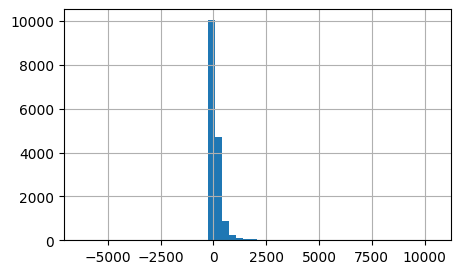

- - - - - - - - -
 gross_margin_power_elect
 missing values : 0.08 %

median: 32.78875786029258 
mean: 34.92224462476202 
mode: 40.48455451313506

minimum: -817.060398572696 
maximum: 582.4552036405884


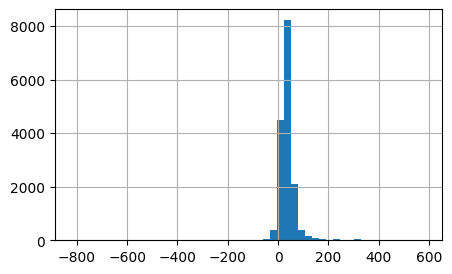

- - - - - - - - -
 net_margin_power_elect
 missing values : 0.08 %

median: 29.47932283084967 
mean: 30.16860440251384 
mode: 36.60665553244281

minimum: -865.4859272313262 
maximum: 526.6634957248223


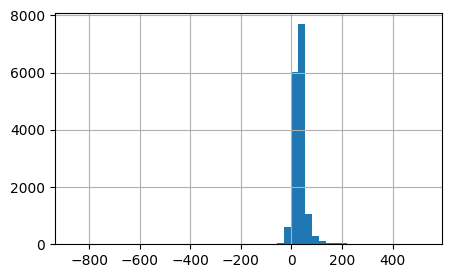

- - - - - - - - -
 number_active_products
 missing values : 0.0 %

minimum: 1 
maximum: 32


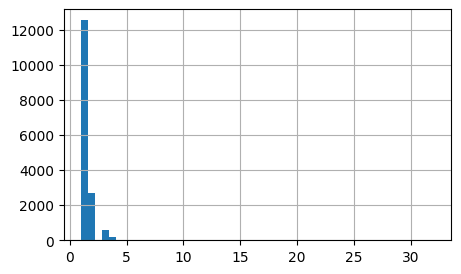

- - - - - - - - -
 total_net_margin
 missing values : 0.09 %

median: 59.29834774710607 
mean: 108.00694018028358 
mode: 0.0

minimum: -2055.717344746537 
maximum: 12174.12222654104


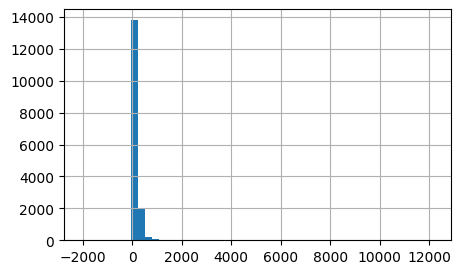

- - - - - - - - -
 customer_antiquity_in_years
 missing values : 0.0 %

minimum: 1 
maximum: 16


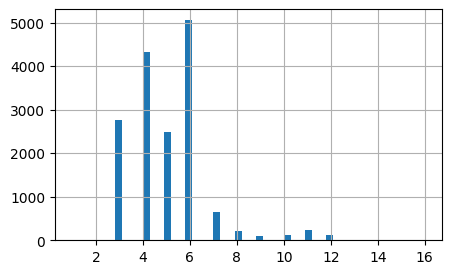

- - - - - - - - -
 subscribed_power
 missing values : 0.02 %

median: 17.34633461841677 
mean: 25.79432341664537 
mode: 16.52508782932313

minimum: 1.2519005931305405 
maximum: 625.95029656527


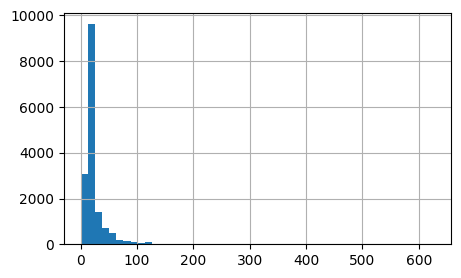

In [9]:
for col in df.columns[1:]:
    if df[col].dtype != 'object':
        print('- - - - - - - - -\n', col)
        print(' missing values :', np.round(missing_df.loc[col, 'percentage_missed'], 2), '%')
        if df[col].notna().sum() == 0:
            pass
        else:
            if df[col].isna().sum() > 0:
                print('\nmedian:', df[col].median(),'\nmean:', df[col].mean(),'\nmode:', df[col].mode()[0])
                
            print('\nminimum:', df[col].min(),'\nmaximum:', df[col].max())
            plt.figure(figsize=(5,3))
            df[col].hist(bins=50)
            plt.show()


Some of the columns contain big percentage (~78%) of missing data, I will not use them in modelling and proceed with the rest.

Columns with low percentage of missing data will be replaced with :
 - mode:
     1. fcst_current_discount
     2. total_net_margin
     3. subscribed_power
         
 - median:
     1. fcst_price_period_1
     2. fcst_price_period_2
     3. fcst_price_power_period_1
 - mean:
     1. gross_margin_power_elect 
     2. net_margin_power_elect 

In [10]:
df['fcst_current_discount'] = df['fcst_current_discount'].fillna(df.fcst_current_discount.mode()[0])
df['fcst_price_period_1'] = df['fcst_price_period_1'].fillna(df.fcst_price_period_1.median())
df['fcst_price_period_2'] = df['fcst_price_period_2'].fillna(df.fcst_price_period_2.median())
df['fcst_price_power_period_1'] = df['fcst_price_power_period_1'].fillna(df.fcst_price_power_period_1.median())
df['gross_margin_power_elect'] = df['gross_margin_power_elect'].fillna(df.gross_margin_power_elect.mean())
df['net_margin_power_elect'] = df['net_margin_power_elect'].fillna(df.net_margin_power_elect.mean())
df['total_net_margin'] = df['total_net_margin'].fillna(df.total_net_margin.mode()[0])
df['subscribed_power'] = df['subscribed_power'].fillna(df.subscribed_power.mode()[0])

Some of the available features contain negative values. I assume that margins and forecasted features potentially could be negative, so ideally it would be great to talk to Product Manager to understand the nature of this values.


But in my opinion, some of the columns (consumption, paid_consumption) still could not be less than zero's, that is why I decided to limit theese values with minimal value:
 - elect_cons_at_12m
 - gas_cons_at_12m
 - elect_cons_last_month
 - current_paid_consumption

In [11]:
df['elect_cons_at_12m'] = df['elect_cons_at_12m'].apply(lambda x: x if x > 0 else 0)
df['gas_cons_at_12m'] = df['gas_cons_at_12m'].apply(lambda x: x if x > 0 else 0)
df['elect_cons_last_month'] = df['elect_cons_last_month'].apply(lambda x: x if x > 0 else 0)
df['current_paid_consumption'] = df['current_paid_consumption'].apply(lambda x: x if x > 0 else 0)

As forecasted values fcst_consumption_elect_cal_year, fcst_consumption_elect_12m, fcst_bill_meter_rent_12m, 
fcst_price_power_period_1 contain values smaller than zero, I decided to create new feature based on that.

In [12]:
# feature engineering
df['fcst_negative'] = np.any(df[['fcst_consumption_elect_cal_year','fcst_consumption_elect_12m',
    'fcst_bill_meter_rent_12m', 'fcst_price_power_period_1']] < 0, axis=1).astype(int)

#### Categorical data and datetime

In [13]:
df.describe(include=['O'])

contract_id                  company_category  \
count                              16096                              6551   
unique                             16096                               419   
top     d07d473503c6bef7cf1922fab1f88f3e  apdekpcbwosbxepsfxclislboipuxpop   
freq                                   1                              1577   

                                 channel contract_activation_date  \
count                              11878                    16096   
unique                                 7                     1961   
top     foosdfpfkusacimwkcsosbicdxkicaua               2009-08-01   
freq                                7377                       99   

       contract_end_date contract_fist_act_date contract_last_mod_date  \
count              16094                   3508                  15939   
unique               371                   1133                   2307   
top           2016-02-01             2009-07-14             2015-11-01   
freq                 152                     34                    592   

       contract_renewal_date client_got_gas    code_elect_campaign_first_subs  
count                  16056          16096                             16009  
unique                   398              2                                 5  
top               2015-06-23              f  lxidpiddsbxsbosboudacockeimpuepw  
freq                     637          13132                              7825

As we can see data also contains categorical:
 - categorical columns is next:
 - company_category	
 - channel
 - code_elect_campaign_first_subs
    
and date type values:
 - contract_activation_date
 - contract_end_date
 - contract_fist_act_date
 - contract_last_mod_date
 - contract_renewal_date


I will transform boolean variable client_got_gas to binary one.

In [14]:
df['is_gas_client'] = df.client_got_gas.map({'f':0, 't':1})

Lets check categorical values and create one-hot encoded features:

In [15]:
(df.company_category.value_counts() / df.contract_id.count()) [:15] 
# column contains 58% of missing data

apdekpcbwosbxepsfxclislboipuxpop   0.10
kkklcdamwfafdcfwofuscwfwadblfmce   0.03
kwuslieomapmswolewpobpplkaooaaew   0.01
fmwdwsxillemwbbwelxsampiuwwpcdcb   0.01
ckfxocssowaeipxueikxcmaxdmcduxsa   0.01
cwofmuicebbcmiaaxufmfimpowpacobu   0.01
cluecxlameloamldmasudocsbmaoamdw   0.01
wxemiwkumpibllwklfbcooafckufkdlm   0.01
sfisfxfcocfpcmckuekokxuseixdaoeu   0.01
sffadmsbuamddwapeumdfibkmpkdicmc   0.00
sxublbwoeuckkocekklxkllcdxxaisop   0.00
ipdldckuswupeifllfbwccfpeafludfi   0.00
saxlifeumaobawxpemwuopbwwldlucff   0.00
dupxuibdflmskeieweeofcaluuuiioix   0.00
daobdssbkieoukwxbopxiiospudkopwl   0.00
Name: company_category, dtype: float64

As column company_category contains a lot categorical values, I will ignore it for now.

In [16]:
(df.channel.value_counts() / df.contract_id.count())

foosdfpfkusacimwkcsosbicdxkicaua   0.46
lmkebamcaaclubfxadlmueccxoimlema   0.13
usilxuppasemubllopkaafesmlibmsdf   0.09
ewpakwlliwisiwduibdlfmalxowmwpci   0.06
sddiedcslfslkckwlfkdpoeeailfpeds   0.00
epumfxlbckeskwekxbiuasklxalciiuu   0.00
fixdbufsefwooaasfcxdxadsiekoceaa   0.00
Name: channel, dtype: float64

In [17]:
(df.code_elect_campaign_first_subs.value_counts() / df.contract_id.count())

lxidpiddsbxsbosboudacockeimpuepw   0.49
kamkkxfxxuwbdslkwifmmcsiusiuosws   0.28
ldkssxwpmemidmecebumciepifcamkci   0.23
usapbepcfoloekilkwsdiboslwaxobdp   0.00
ewxeelcelemmiwuafmddpobolfuxioce   0.00
Name: code_elect_campaign_first_subs, dtype: float64

Categorical columns channel and code_elect_campaign_first_subs will be one-hot encoded.

In [18]:
categorical_cols = ['channel', 'code_elect_campaign_first_subs', ]
df = pd.get_dummies(df, columns=categorical_cols)

Lets check date-type columns:

In [19]:
date_cols = ['contract_activation_date', 'contract_end_date', 
             'contract_fist_act_date', 'contract_last_mod_date', 'contract_renewal_date']

df[date_cols].head()

contract_activation_date contract_end_date contract_fist_act_date  \
0               2010-01-05        2016-12-12                    NaN   
1               2009-11-04        2016-11-04                    NaN   
2               2013-02-16        2016-02-16                    NaN   
3               2012-01-25        2017-01-25                    NaN   
4               2011-11-12        2016-11-12             2011-11-12   

  contract_last_mod_date contract_renewal_date  
0             2015-11-01            2015-12-14  
1             2009-11-04            2015-11-05  
2             2013-02-16            2015-02-18  
3             2015-12-16            2016-01-26  
4             2015-09-20            2015-11-13

The first idea that came into my mind is to create features based on last modification and time when contract ends.

Firstly, let's check n/a values:

In [20]:
df[['contract_id'] + date_cols][df.contract_end_date.isna()].head()

contract_id contract_activation_date  \
8537   f7aed20b79f48e9e87687dc74fc6a353               2013-06-19   
14848  ec6c8b46866d76e99623ddcf9d334835               2010-09-06   

      contract_end_date contract_fist_act_date contract_last_mod_date  \
8537                NaN             2010-04-19                    NaN   
14848               NaN                    NaN             2015-05-24   

      contract_renewal_date  
8537                    NaN  
14848                   NaN

In [21]:
df[['contract_id'] + date_cols][df.contract_end_date < '2016-01-01'].head()

contract_id contract_activation_date  \
8799   5e155e219ca281546ee8012347ebb5f7               2011-05-06   
10928  f5af5ec0e22ba4e231d405fa60f4d040               2005-08-26   

      contract_end_date contract_fist_act_date contract_last_mod_date  \
8799         2013-05-06                    NaN             2011-05-06   
10928        2006-08-26             2005-08-26             2015-07-10   

      contract_renewal_date  
8799             2014-05-15  
10928                   NaN

As we can see two contract ids (5e155e219ca281546ee8012347ebb5f7 and f5af5ec0e22ba4e231d405fa60f4d040) expired long before, that is why, I will exclude theese 2 rows from my sample. In real life it is the reason to talk to managers to understand if it is not fraud or mistakes in database, or we simply need to renew the contract.

In [22]:
df = df[~df.contract_id.isin(['5e155e219ca281546ee8012347ebb5f7', 'f5af5ec0e22ba4e231d405fa60f4d040'])]

In [23]:
df[['contract_id'] + date_cols][df.contract_last_mod_date.isna()].head()

contract_id contract_activation_date  \
78   8b456e817e3daee08ccc958c70a85013               2013-07-04   
342  ecd570437e0441b9263e29f962c31946               2013-06-07   
610  cc3be498e792f168159bb0cab58fdb15               2013-05-31   
863  a375227dbd198e4702f2c522c2d78f68               2005-02-02   
872  7e4051885cba488131424c0148bbcfba               2013-06-03   

    contract_end_date contract_fist_act_date contract_last_mod_date  \
78         2016-07-04                    NaN                    NaN   
342        2016-06-07                    NaN                    NaN   
610        2016-05-31                    NaN                    NaN   
863        2016-02-15                    NaN                    NaN   
872        2016-06-03                    NaN                    NaN   

    contract_renewal_date  
78             2015-07-08  
342            2015-06-08  
610            2015-06-02  
863            2015-02-16  
872            2015-06-09

In [24]:
df['days_till_contract_ends'] = (pd.to_datetime(df.contract_end_date) - 
                                 pd.to_datetime('2016-01-01')) / np.timedelta64(1, 'D')
df['days_till_contract_ends'] = df.days_till_contract_ends.fillna(df.days_till_contract_ends.median())


df['days_from_last_modification'] = (pd.to_datetime('2016-01-01') - pd.to_datetime(df.contract_last_mod_date)
                                     ) / np.timedelta64(1, 'D')

df['days_from_last_modification'] = df.days_from_last_modification.fillna(df.days_from_last_modification.mode()[0])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16094 entries, 0 to 16095
Data columns (total 46 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   contract_id                                                      16094 non-null  object 
 1   company_category                                                 6550 non-null   object 
 2   campaing_code_elect                                              0 non-null      float64
 3   elect_cons_at_12m                                                16094 non-null  int64  
 4   gas_cons_at_12m                                                  16094 non-null  int64  
 5   elect_cons_last_month                                            16094 non-null  int64  
 6   contract_activation_date                                         16094 non-null  object 
 7   contract_end_date                       

Lets check the correlation between data.

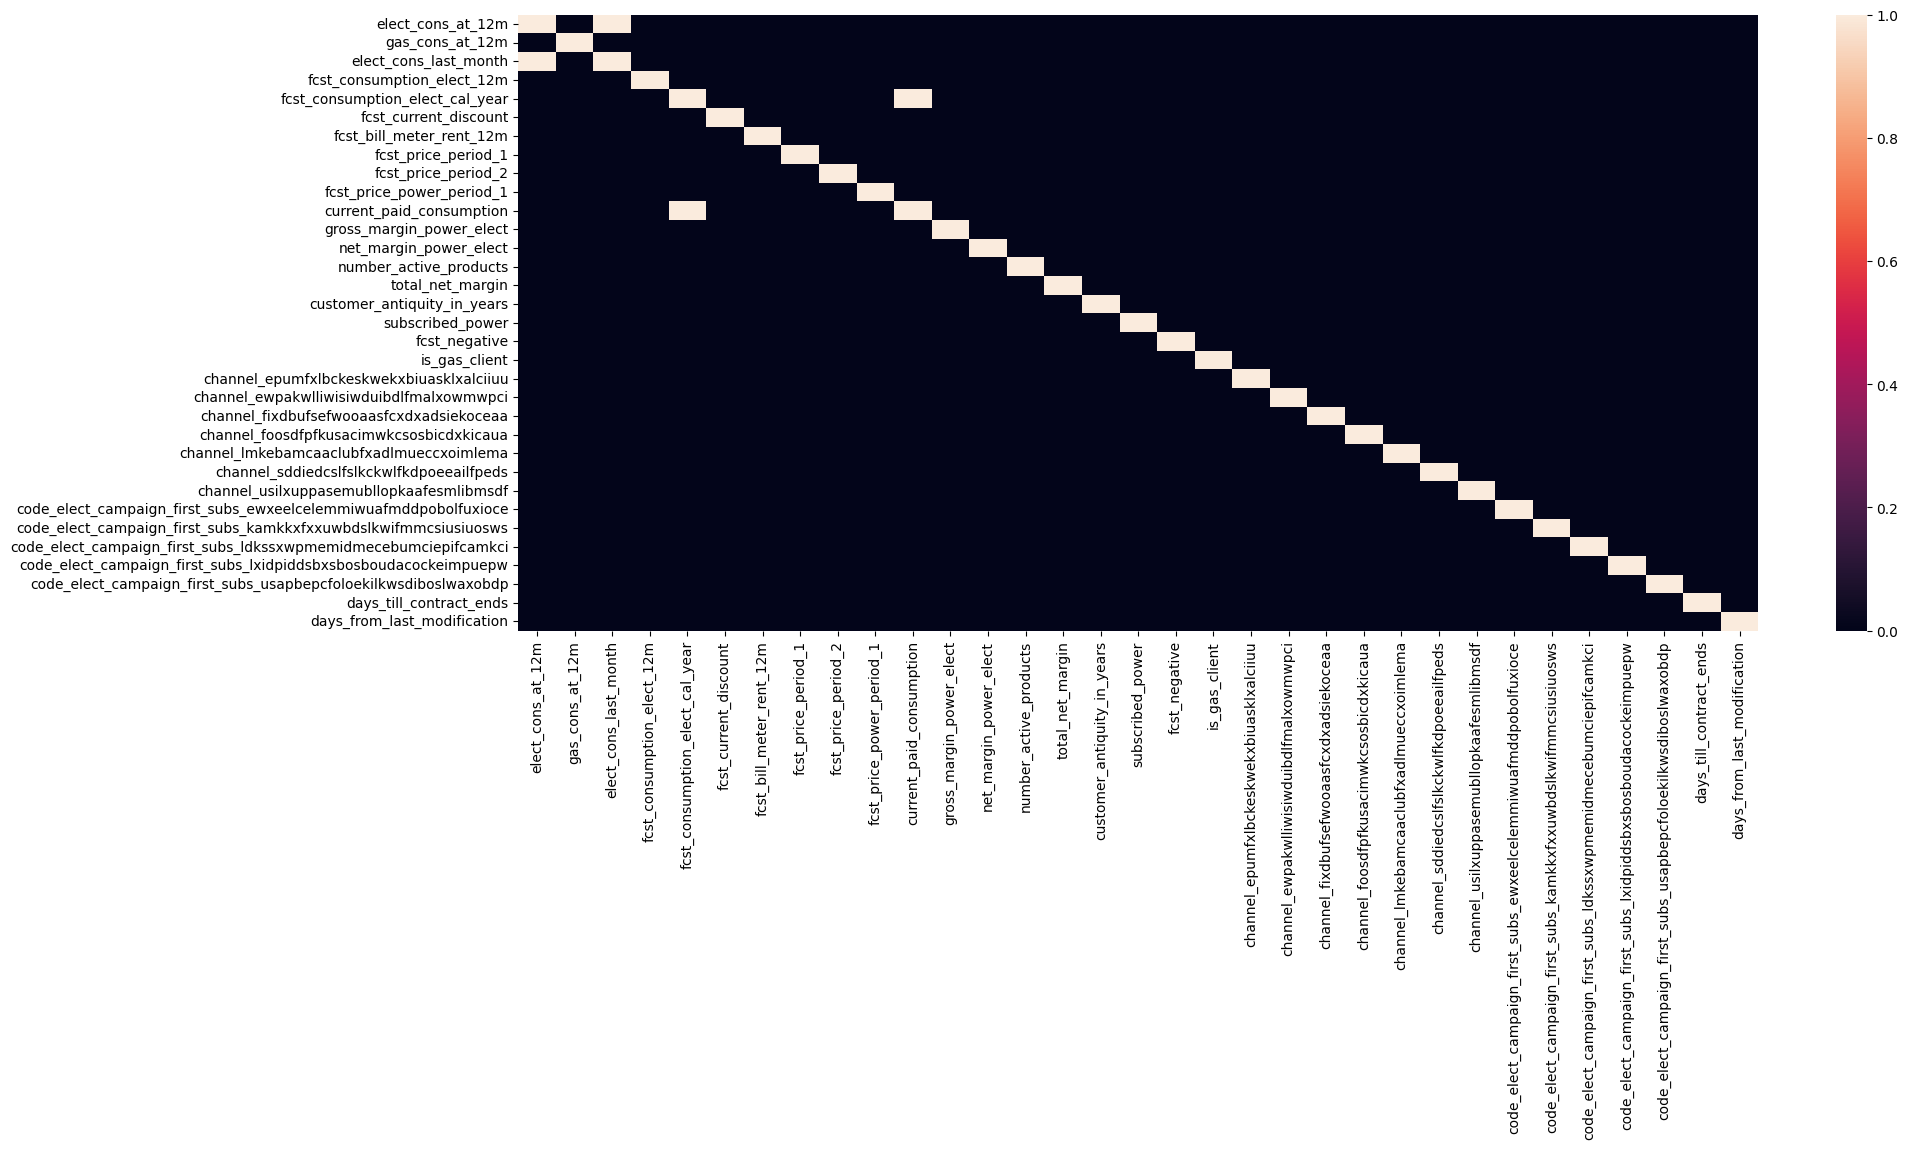

In [26]:
plt.figure(figsize=(20, 8))
sns.heatmap(
df.drop(['contract_id', 'company_category', 'campaing_code_elect', 'contract_activation_date', 'contract_end_date',
         'contract_fist_act_date', 'contract_last_mod_date', 'contract_renewal_date', 
         'fcst_bill_baseline_elect_next_month', 'fcst_bill_baseline_elect_cal_year', 'fcst_bill_baseline_elect_12m',
         'fcst_consumption_elect_next_month', 'client_got_gas'], axis=1).corr() > 0.85)
plt.show()

It is necessary to remove highly corelated features (fcst_consumption_elect_cal_year and elect_cons_at_12m), because they could mask detection iteractions between features.

In [27]:
to_exclude = ['contract_id', 'company_category', 'campaing_code_elect', 'contract_activation_date', 
              'contract_end_date', 'contract_fist_act_date', 'contract_last_mod_date', 'contract_renewal_date', 
              'fcst_bill_baseline_elect_next_month', 'fcst_bill_baseline_elect_cal_year', 
              'fcst_bill_baseline_elect_12m', 'fcst_consumption_elect_next_month', 'client_got_gas',
              'fcst_consumption_elect_cal_year', 'elect_cons_at_12m',
             ]

Merging features and target:

In [28]:
dataframe = df.merge(df_target, how='left')

During descriptive analysis I came up with several additional features.

In [29]:
# feature engineering

# dataframe['fcst_price_2_more_zero'] = dataframe.fcst_price_period_2.apply(lambda x: 1 if x > 0 else 0)
dataframe['diff_gross_net_power_margin_elect'] = dataframe.gross_margin_power_elect - dataframe.net_margin_power_elect
dataframe['is_fcst_discount'] = dataframe.fcst_current_discount.apply(lambda x : 1 if x > 0 else 0)

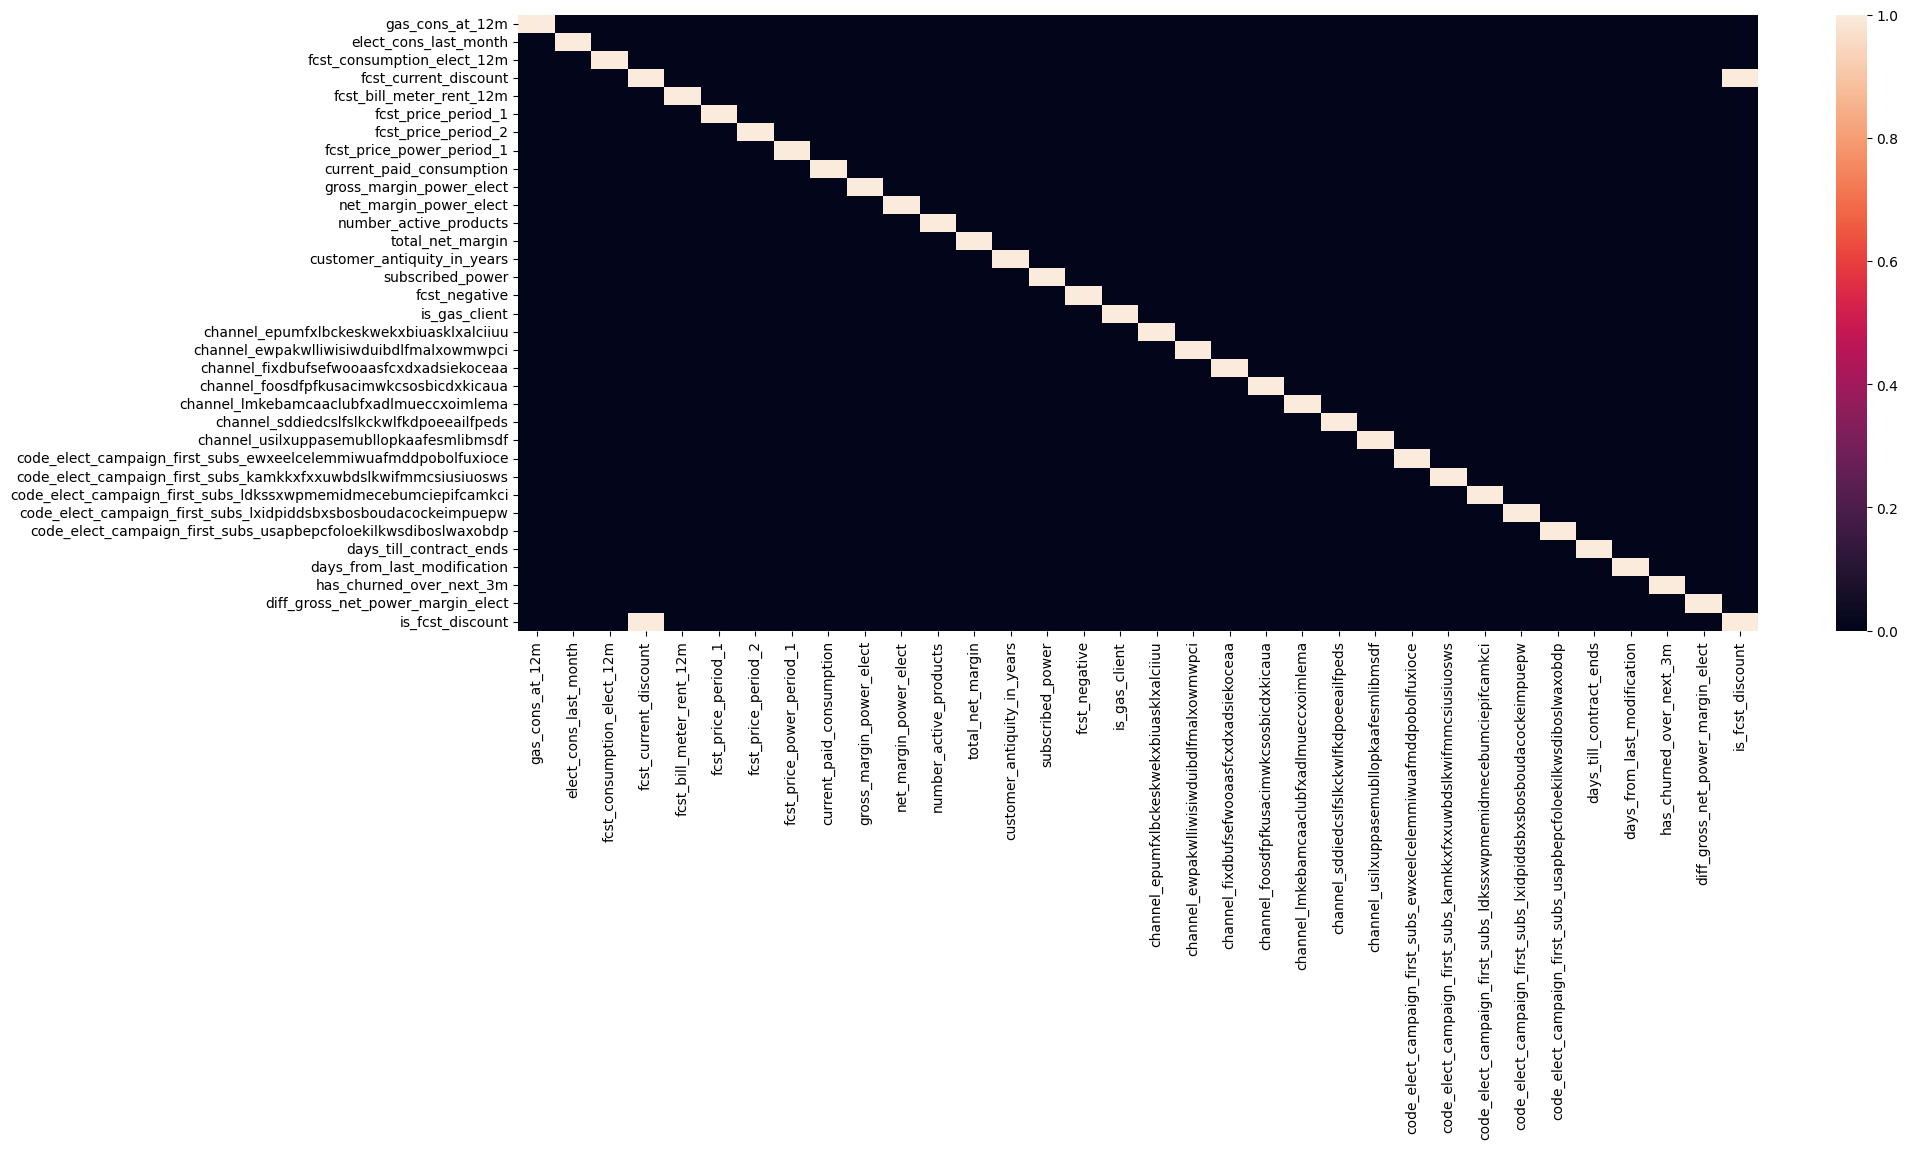

In [30]:
plt.figure(figsize=(20, 8))
sns.heatmap(dataframe[[col for col in dataframe.columns if col not in to_exclude]].corr() > 0.85)
plt.show()

In [31]:
to_exclude.append('fcst_current_discount')

# Training

In this notebook I will present just two options of training:
 - Random Forest 
 - SMOTE + XGBoost

### Random Forest

Lets split data, stratifying be target feature and apply Random Forest with weighted classes:

In [32]:
X_train, X_test, y_train, y_test = train_test_split(dataframe.drop(to_exclude + ['has_churned_over_next_3m'], 
                                                                   axis=1), 
                                                    dataframe['has_churned_over_next_3m'],
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=dataframe['has_churned_over_next_3m'])


w_classes = compute_class_weight(class_weight='balanced', classes=[0,1], y=dataframe.has_churned_over_next_3m)

model = RandomForestClassifier(class_weight={0:w_classes[0], 1:w_classes[1]})
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      3192
           1       0.07      0.81      0.13        27

    accuracy                           0.91      3219
   macro avg       0.53      0.86      0.54      3219
weighted avg       0.99      0.91      0.94      3219



In [34]:
auc_score = roc_auc_score(np.array(y_test), preds)
print('ROC AUC:', np.round(auc_score, 4))

print('Brier score:', np.round(brier_score_loss(np.array(y_test),
                                                np.array([x for x in model.predict_proba(X_test)[:, 1]])), 4))

ROC AUC: 0.5336
Brier score: 0.0815


As we can see, balancing classes does not help me a lot in modelling. Algorithm catches major class much more better, but we are interested in having a stable model. Furthermore roc auc score is not really good. That is why lets try next option.

### Smote + XGboost

Firstly, I will apply oversampling technique to balancing dataset and then XGBoost for modelling:

In [35]:
X_train, y_train = SMOTE(k_neighbors=4).fit_resample(X_train, y_train)

model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(classification_report(preds, y_test))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      3064
           1       0.20      0.41      0.27       155

    accuracy                           0.89      3219
   macro avg       0.58      0.66      0.61      3219
weighted avg       0.93      0.89      0.91      3219



In [36]:
auc_score = roc_auc_score(np.array(y_test), preds)
print('ROC AUC:', np.round(auc_score, 4))
print('Brier score:', np.round(brier_score_loss(np.array(y_test),
                                                np.array([x for x in model.predict_proba(X_test)[:, 1]])), 4))

ROC AUC: 0.5846
Brier score: 0.0907


Results improve a bit. As we can see, f1-score(accordingly precision and recall) for churn (1) class increased. 
Presicion for 0-class decreased, but it is expectadly. Usually in evaluating results there is a trade of. 
Also good point that roc auc score increase - still, we could not push this model in production, but usually it is a start. For now we accept this, and lets proceed with a flow.

### Determining threshold for prediction

Lets try to finetune the threshold for last model.

Best threshold: 0.2596942 
F1 score: 0.31917631917631917


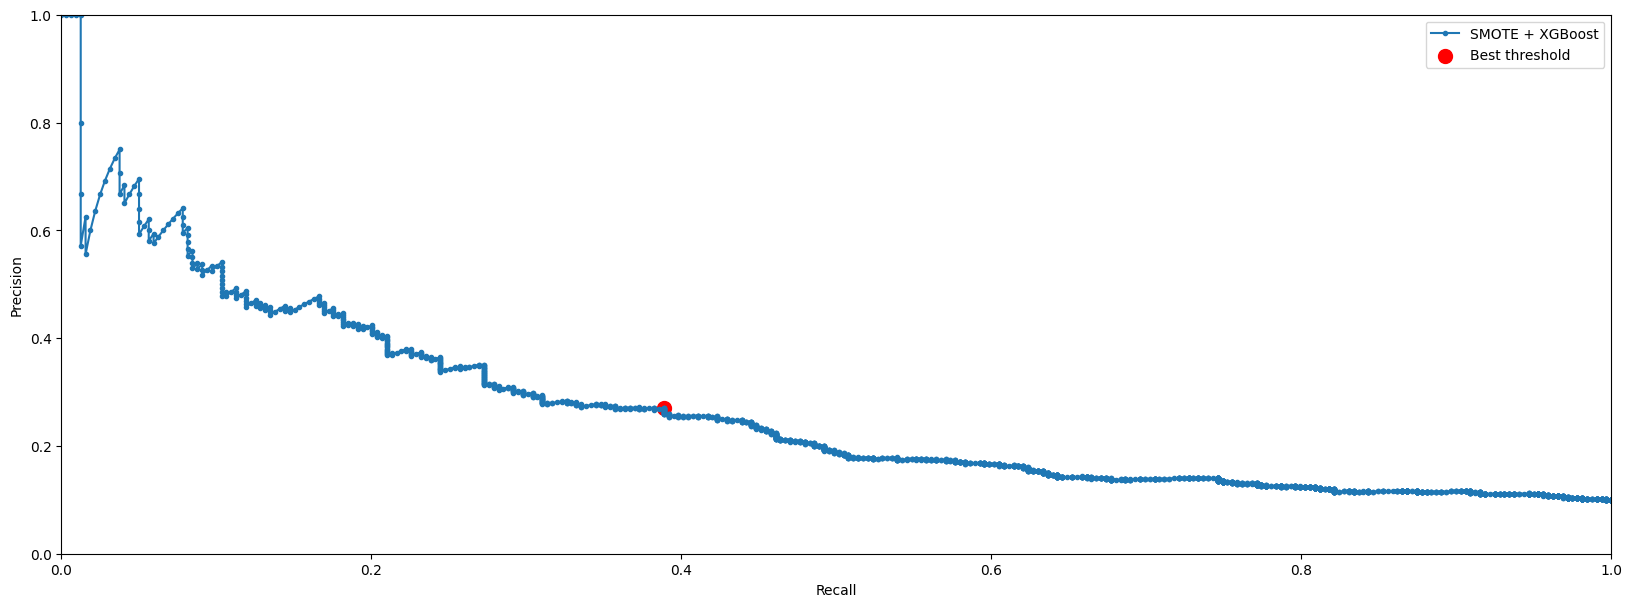

In [37]:
preds_prob = model.predict_proba(X_test)

precision, recall, thresholds = precision_recall_curve(y_test, preds_prob[:,1])
f1score = (2 * precision * recall) / (precision + recall)
indx = np.argmax(f1score)

print('Best threshold:', thresholds[indx], '\nF1 score:', f1score[indx])

plt.figure(figsize=(20,7))
plt.plot(recall, precision, marker='.', label='SMOTE + XGBoost')
plt.scatter(recall[indx], precision[indx], marker='o', color='red', label='Best threshold', s=100)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

And check results:

In [38]:
final_preds = np.array([int(x >= thresholds[indx]) for x in model.predict_proba(X_test)[:, 1]])

print(classification_report(final_preds, y_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      2761
           1       0.39      0.27      0.32       458

    accuracy                           0.84      3219
   macro avg       0.64      0.60      0.61      3219
weighted avg       0.81      0.84      0.82      3219



In [39]:
print('ROC AUC:', np.round(roc_auc_score(np.array(y_test), final_preds), 4))

print('Brier score:', np.round(brier_score_loss(np.array(y_test),
                                                np.array([x for x in preds_prob[:,1]])), 4))

ROC AUC: 0.6368
Brier score: 0.0907


So, on this point, roc auc score, precision and recall(for churn/1 class) increased.
This will be the final result for now.

Good thing is to understand which kind of features were the most important for algorithm to make predictions.

In [40]:
pd.DataFrame([[x] for x in model.feature_importances_], 
             index=dataframe.drop(to_exclude + ['has_churned_over_next_3m'],  
                                  axis=1).columns, 
             columns=['feature_importances']).sort_values('feature_importances', ascending=False).head(15)

feature_importances
code_elect_campaign_first_subs_kamkkxfxxuwbdslk...                 0.23
code_elect_campaign_first_subs_lxidpiddsbxsbosb...                 0.23
code_elect_campaign_first_subs_ldkssxwpmemidmec...                 0.15
channel_lmkebamcaaclubfxadlmueccxoimlema                           0.05
channel_usilxuppasemubllopkaafesmlibmsdf                           0.04
channel_ewpakwlliwisiwduibdlfmalxowmwpci                           0.04
fcst_price_period_2                                                0.04
is_fcst_discount                                                   0.03
fcst_price_power_period_1                                          0.03
channel_foosdfpfkusacimwkcsosbicdxkicaua                           0.02
customer_antiquity_in_years                                        0.02
number_active_products                                             0.01
diff_gross_net_power_margin_elect                                  0.01
subscribed_power                                                   0.01
is_gas_client                                                      0.01

So, the most important features were:
   - code_elect_campaign_first_subs
   - channel
   - fcst_price_period_2
   - is_fcst_discount
   - fcst_price_power_period_1
   - customer_antiquity_in_years

## Note:


### To do:
    
   - use historical data for aggregation price_energy_.. and price_power_.. (fillna with backward or forward filling, take a mean for every period and power)
   - feature engineering based available data (specificly on forecasted data)
   To do: One of the options to binning large values (put some limitations like quantile .99 or .98)
   - create new feature to show the relation between forecased and historical price power/energy
   - finetune algorithm to with RandomizedSearchCV and GridSearchCV
   - use additionally validation set(split data for train, test and val sets) - one of them for finetuning model 
   - combine oversampling and undersampling for balancing the data

- - -

## Discount offering

Company would like to have a view on whether the 20% discount offer to customers predicted to be churned is a good measure. 

Given that it is a steep discount bringing their price lower than all competitors we can assume for now that everyone who is offered will accept it. According to regulations they cannot raise the price of someone within a year if they accept the discount. Therefore, offering it excessively is going to hit revenues hard.

In ideal world we can calculate the revenue(net margin)/bill per squared meter of each customer and take 20% off, to understand if the company is still earning. Then offer 20% discount for customers with positive/minimal revenue.

Electricity bill = Total consumed energy in unit x unit price (sum by periods)


But real world is a bit different.
Good option to understand our customers is user segmentation. That would allow us to understand our customer's behavior better and be more personalized.

Now, I will show the short results of draft segmentation.

In [41]:
df_plot = pd.read_csv('../data/Aily - DS Challange - Churn - Data/plot.csv')
df_plot['new_cluster'] = df_plot['new_cluster'].apply(lambda x: 'group_' + str(x))
df_plot.set_index('new_cluster', inplace=True)
df_plot.style.background_gradient().format('{:.2f}')

Noticed couple of groups:

 - group 1: customers who do not use electricity and do not paid;
 - group 2, 6: customers who use electricity and paid (differs in electricity usage);
 - group 3: customers with highest bills and total net margin;
 - group 4: customers with highest electricity consumption; 
 - group 5: customers who already use huge discounts;
 - group 7: customers with the highest bill per meter rent.
 
 - - -
 
 I think we can offer discounts for:
  - group 2,6: as they are reliable.
  - group 3: as they bring the best revenue and it will be painfully to loose them.
  
 
 In my opinion we could exclude the following groups from the offer. However, such decision should be dicussed with the manager:
  - group 1: maybe will not take a discount, or not interested in
  - group 4: maybe use electricity in optimal hours, revenue should be calculated additionally
  - group 5: do not need to give them higher discounts, as they already use 15%
  - group 7: bill per meter rent should be reevaluated, tariffs is so huge.

In [42]:
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import warnings

def plot_radar(data, cols_to_plot):    
    fig = go.Figure()

    for cluster_name, row in data.iterrows():
        fig.add_trace(go.Scatterpolar(
              r=row.values,
              theta=cols_to_plot,
              fill='toself',
              name=cluster_name
        ))

    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=False,

        )),
      showlegend=True)

    fig.show()

plot_radar(pd.DataFrame(StandardScaler().fit_transform(df_plot), index=df_plot.index), df_plot.columns)